# Fine Tune YOLOv8 Model

## Overview
This notebook fine-tunes a YOLOv8 model for detecting football players and their positions on the field. The model is trained to identify specific football positions and roles during pre-snap formations.

## What We're Doing
1. **Dataset Preparation**: Load the "presnaps-large-model" dataset from Roboflow containing annotated football images
   - Dataset: [presnaps-large-model on Roboflow Universe](https://universe.roboflow.com/boilermake-2025/presnaps-large-model)
2. **Model Initialization**: Start with a pre-trained YOLOv8 medium model (`yolov8m.pt`)
3. **Fine-tuning**: Train the model for 50 epochs on football-specific data
4. **Object Detection Classes**: 
   - `defense`: Defensive players
   - `oline`: Offensive line players  
   - `qb`: Quarterback
   - `ref`: Referee
   - `running_back`: Running back
   - `tight_end`: Tight end
   - `wide_receiver`: Wide receivers
5. **Model Deployment**: Push the trained model to Hugging Face Hub for easy access and sharing
   - Model: [gridiron-ai-football-detector on Hugging Face](https://huggingface.co/lmarte17/gridiron-ai-football-detector)

## Output
The fine-tuned model will be saved and made available for football formation analysis and player position detection in game footage.

**Note**: This notebook was trained using a Google Colab notebook with a GPU (Tesla T4)

In [1]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 42.0/112.6 GB disk)


In [2]:
!pip install huggingface_hub
import huggingface_hub
huggingface_hub.login()


In [3]:
!pip install roboflow

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("boilermake-2025").project("presnaps-large-model")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [6]:
# finetune YOLOv8
# Load pre-trained model
from ultralytics import YOLO
model = YOLO('yolov8m.pt')


image 1/1 /content/presnaps-large-model-1/train/images/57558_002886_Sideline_frame204_jpg.rf.386300f508e1beea9a6034e14cb6fca8.jpg: 640x640 19 persons, 1 tv, 10.0ms
Speed: 2.5ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


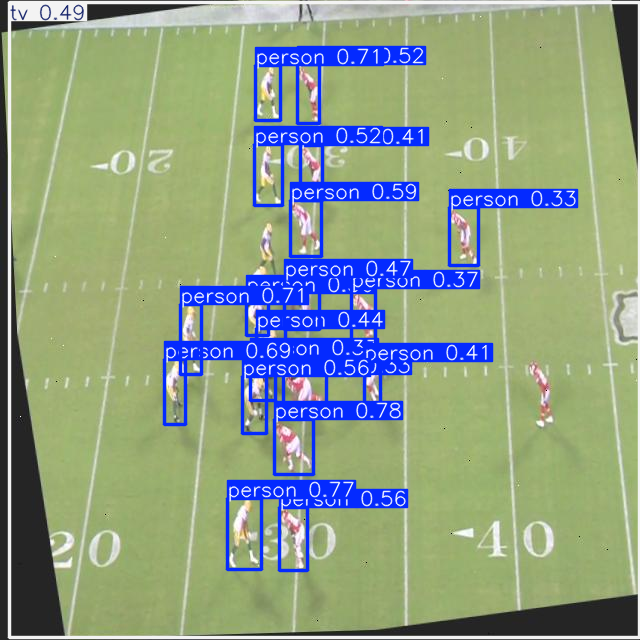

In [8]:
results = model('presnaps-large-model-1/train/images/57558_002886_Sideline_frame204_jpg.rf.386300f508e1beea9a6034e14cb6fca8.jpg', conf=0.25)
results[0].show()


image 1/1 /content/drive/MyDrive/CU-Boulder-MSCS/Machine_Learning/Deep_Learning/Final_Project/pass_0001_88.jpg: 384x640 13 persons, 60.0ms
Speed: 2.4ms preprocess, 60.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


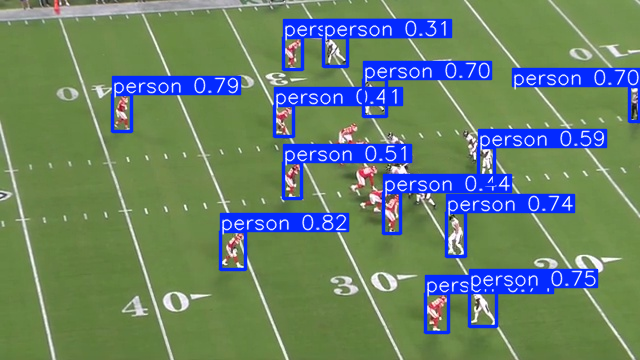

In [9]:
# Check model on newly acquired presnap screenshots
new_result = model('/content/drive/MyDrive/CU-Boulder-MSCS/Machine_Learning/Deep_Learning/Final_Project/pass_0001_88.jpg', conf=.25)
new_result[0].show()

In [16]:
# Fine-tune on your football dataset
model.train(
    data='presnaps-large-model-1/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='football_detector'
)

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=presnaps-large-model-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=football_detector5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

train: Scanning /content/presnaps-large-model-1/train/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 329.7±84.6 MB/s, size: 43.1 KB)


val: Scanning /content/presnaps-large-model-1/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/football_detector5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/football_detector5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.27G      1.679      1.139      1.226        338        640: 100%|██████████| 13/13 [00:02<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         50       1157      0.556      0.596      0.637      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.4G      1.688      1.097      1.203        328        640: 100%|██████████| 13/13 [00:01<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         50       1157      0.502      0.519      0.566      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.43G      1.596      1.098      1.188        296        640: 100%|██████████| 13/13 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         50       1157      0.528      0.661       0.63      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.43G      1.624      1.101      1.221        233        640: 100%|██████████| 13/13 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         50       1157      0.578      0.653      0.661      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.43G      1.592      1.053      1.175        263        640: 100%|██████████| 13/13 [00:01<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         50       1157      0.564      0.731      0.687      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       8.5G      1.613      1.028      1.197        398        640: 100%|██████████| 13/13 [00:01<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         50       1157      0.554      0.627      0.605      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       8.5G      1.632      1.007      1.198        348        640: 100%|██████████| 13/13 [00:01<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         50       1157      0.619      0.673      0.676      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.57G        1.6      1.015      1.181        205        640: 100%|██████████| 13/13 [00:01<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         50       1157       0.66      0.673      0.717      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.63G      1.575          1      1.169        243        640: 100%|██████████| 13/13 [00:01<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         50       1157      0.691      0.665      0.745      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       8.7G      1.615     0.9973      1.185        336        640: 100%|██████████| 13/13 [00:01<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         50       1157      0.656      0.714      0.736      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.77G       1.62      0.963      1.182        250        640: 100%|██████████| 13/13 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         50       1157       0.66      0.697       0.73      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.77G      1.609     0.9431      1.169        243        640: 100%|██████████| 13/13 [00:01<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         50       1157      0.658      0.665      0.698      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.77G      1.612     0.9503      1.177        143        640: 100%|██████████| 13/13 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         50       1157       0.71      0.748      0.788      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.77G      1.583     0.9381      1.157        254        640: 100%|██████████| 13/13 [00:01<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         50       1157      0.716      0.718      0.773      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.77G      1.545     0.9152      1.159        267        640: 100%|██████████| 13/13 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         50       1157      0.726      0.733      0.784      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.77G      1.597     0.9408      1.185        314        640: 100%|██████████| 13/13 [00:01<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         50       1157       0.67      0.656      0.721      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.77G      1.498     0.9156      1.141        249        640: 100%|██████████| 13/13 [00:01<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         50       1157      0.741      0.729      0.767      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.77G      1.473     0.8745      1.134        204        640: 100%|██████████| 13/13 [00:01<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         50       1157      0.705      0.749      0.789      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.77G      1.477     0.8682      1.131        132        640: 100%|██████████| 13/13 [00:01<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         50       1157      0.757       0.73      0.812      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.77G      1.493     0.8705      1.118        336        640: 100%|██████████| 13/13 [00:01<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         50       1157      0.731      0.735      0.801      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.77G       1.49     0.8858      1.143        224        640: 100%|██████████| 13/13 [00:01<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         50       1157       0.72      0.819      0.846      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.77G      1.501     0.8434      1.127        307        640: 100%|██████████| 13/13 [00:01<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         50       1157      0.769      0.734      0.802      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.77G      1.482     0.8555      1.124        327        640: 100%|██████████| 13/13 [00:01<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         50       1157      0.756      0.773      0.835      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.77G      1.472     0.8423      1.137        207        640: 100%|██████████| 13/13 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         50       1157      0.735      0.835      0.842      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.77G      1.465     0.8376      1.119        190        640: 100%|██████████| 13/13 [00:01<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         50       1157      0.769      0.787      0.844      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.77G      1.424     0.8128      1.104        154        640: 100%|██████████| 13/13 [00:01<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         50       1157      0.734      0.755      0.804      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.77G      1.477     0.8251      1.121        166        640: 100%|██████████| 13/13 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         50       1157       0.74      0.763      0.812      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.77G      1.428     0.7979      1.109        339        640: 100%|██████████| 13/13 [00:01<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         50       1157      0.761      0.775      0.836      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.77G      1.457     0.8218      1.118        262        640: 100%|██████████| 13/13 [00:01<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         50       1157      0.796      0.761      0.827      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.77G      1.432     0.7905      1.098        289        640: 100%|██████████| 13/13 [00:01<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         50       1157      0.779      0.785      0.835       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.77G      1.449      0.788      1.093        298        640: 100%|██████████| 13/13 [00:01<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         50       1157      0.747      0.791      0.815      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.77G       1.42      0.783      1.106        282        640: 100%|██████████| 13/13 [00:01<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         50       1157      0.765      0.781      0.809      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.77G      1.404     0.7677      1.089        283        640: 100%|██████████| 13/13 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         50       1157      0.743      0.773      0.809      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.77G      1.362     0.7699      1.081        247        640: 100%|██████████| 13/13 [00:01<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         50       1157      0.737      0.806      0.832      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.77G      1.354     0.7517      1.076        249        640: 100%|██████████| 13/13 [00:01<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         50       1157      0.736      0.801      0.831      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.77G      1.399     0.7624      1.093        212        640: 100%|██████████| 13/13 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         50       1157      0.788      0.793      0.862       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.77G      1.389     0.7629      1.087        185        640: 100%|██████████| 13/13 [00:01<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         50       1157      0.788      0.795      0.848      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.77G      1.353     0.7451       1.07        220        640: 100%|██████████| 13/13 [00:01<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         50       1157      0.765        0.8      0.833      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.77G      1.327     0.7385      1.067        246        640: 100%|██████████| 13/13 [00:01<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         50       1157      0.716      0.828      0.846      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.77G      1.339     0.7376      1.066        301        640: 100%|██████████| 13/13 [00:01<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         50       1157        0.8       0.76      0.843       0.53


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.77G      1.333     0.6946      1.107        178        640: 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         50       1157      0.794      0.772      0.851      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.77G      1.347     0.6921      1.102        187        640: 100%|██████████| 13/13 [00:01<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         50       1157      0.792      0.773      0.855      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.77G      1.289     0.6735      1.087        185        640: 100%|██████████| 13/13 [00:01<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         50       1157      0.777      0.822      0.855      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.77G      1.277     0.6577      1.075        180        640: 100%|██████████| 13/13 [00:01<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         50       1157      0.782      0.817      0.857      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.77G      1.281     0.6527      1.079        184        640: 100%|██████████| 13/13 [00:01<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         50       1157      0.813      0.789      0.855      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.77G      1.281     0.6556       1.07        187        640: 100%|██████████| 13/13 [00:01<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         50       1157      0.816      0.781      0.855      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.77G      1.233     0.6366      1.065        179        640: 100%|██████████| 13/13 [00:01<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         50       1157      0.803      0.804      0.855      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.77G      1.263     0.6471      1.063        185        640: 100%|██████████| 13/13 [00:01<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         50       1157      0.815      0.803      0.863      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.77G      1.261     0.6428      1.069        184        640: 100%|██████████| 13/13 [00:01<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         50       1157      0.812      0.803      0.863      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.77G      1.254     0.6369      1.052        186        640: 100%|██████████| 13/13 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         50       1157      0.811      0.808      0.864      0.554



50 epochs completed in 0.038 hours.
Optimizer stripped from runs/detect/football_detector5/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/football_detector5/weights/best.pt, 52.0MB

Validating runs/detect/football_detector5/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]


                   all         50       1157      0.777      0.823      0.855      0.563
               defense         50        550      0.908      0.942      0.972      0.671
                 oline         50        250      0.848      0.924       0.93      0.572
                    qb         50         50      0.731      0.816      0.871      0.483
                   ref         31         57      0.808      0.887      0.878      0.562
          running_back         44         49      0.747      0.837      0.886      0.581
             tight_end         38         39      0.565      0.513      0.555      0.398
         wide_receiver         50        162       0.83      0.844      0.895      0.671
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/football_detector5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7feda09c1450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [17]:
ft_model = YOLO('runs/detect/football_detector5/weights/best.pt')


image 1/1 /content/presnaps-large-model-1/train/images/57558_002886_Sideline_frame204_jpg.rf.386300f508e1beea9a6034e14cb6fca8.jpg: 640x640 11 defenses, 5 olines, 1 qb, 1 ref, 1 running_back, 4 wide_receivers, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


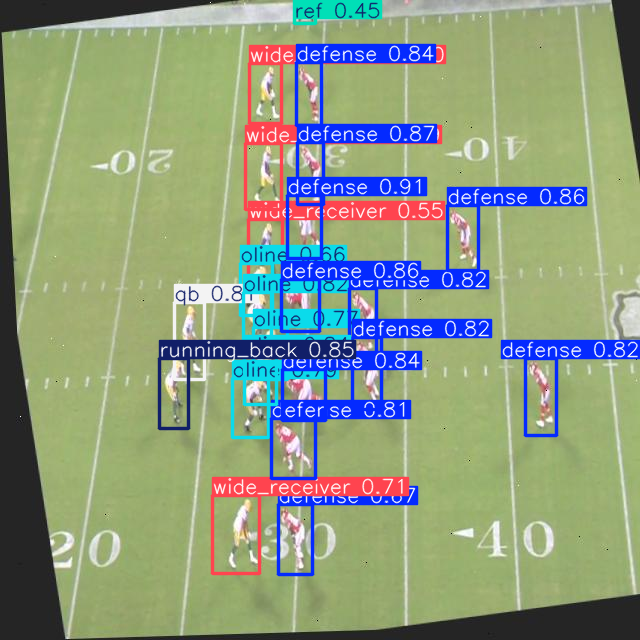

In [18]:
results = ft_model('presnaps-large-model-1/train/images/57558_002886_Sideline_frame204_jpg.rf.386300f508e1beea9a6034e14cb6fca8.jpg', conf=0.25)
results[0].show()


image 1/1 /content/drive/MyDrive/CU-Boulder-MSCS/Machine_Learning/Deep_Learning/Final_Project/pass_0001_88.jpg: 384x640 11 defenses, 5 olines, 1 qb, 1 ref, 2 running_backs, 5 wide_receivers, 14.1ms
Speed: 2.4ms preprocess, 14.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


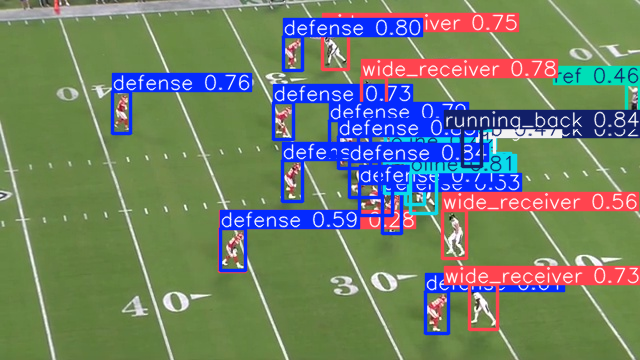

In [19]:
# Check model on newly acquired presnap screenshots
new_result = ft_model('/content/drive/MyDrive/CU-Boulder-MSCS/Machine_Learning/Deep_Learning/Final_Project/pass_0001_88.jpg', conf=.25)
new_result[0].show()

In [20]:
from huggingface_hub import HfApi, create_repo

# Initialize API
api = HfApi()

In [21]:
# Create repository (if it doesn't exist)
repo_id = "lmarte17/gridiron-ai-football-detector"
create_repo(repo_id=repo_id, exist_ok=True)

RepoUrl('https://huggingface.co/lmarte17/gridiron-ai-football-detector', endpoint='https://huggingface.co', repo_type='model', repo_id='lmarte17/gridiron-ai-football-detector')

In [23]:
# Push your trained YOLOv8 model
api.upload_file(
    path_or_fileobj="runs/detect/football_detector5/weights/best.pt",  # Your model path
    path_in_repo="best.pt",  # Name in the repo
    repo_id=repo_id,
    commit_message="Add trained YOLOv8 football detection model"
)

# Also upload other important files
api.upload_file(
    path_or_fileobj="presnaps-large-model-1/data.yaml",
    path_in_repo="data.yaml",
    repo_id=repo_id,
    commit_message="Add dataset configuration"
)

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/lmarte17/gridiron-ai-football-detector/commit/342e04023ce80b3a7764559d0c9d4926be39e015', commit_message='Add dataset configuration', commit_description='', oid='342e04023ce80b3a7764559d0c9d4926be39e015', pr_url=None, repo_url=RepoUrl('https://huggingface.co/lmarte17/gridiron-ai-football-detector', endpoint='https://huggingface.co', repo_type='model', repo_id='lmarte17/gridiron-ai-football-detector'), pr_revision=None, pr_num=None)